# PyTorch semantic segmentation 
For this last exercise you are going to work on a new computer vision task called semantic segmentation where not an entire image but each pixel is classified. This means in comparison to image classification your model outputs not a single class but a segmentation with the same size as the input image. Since you have already learned a lot in the past exercises and you are now familiar with the basics of PyTorch the model design and architecture as well as the training is totally up to you. We only provide you with the train and validation dataset and recommend you to look for PyTorch implementations and finetuning weights of famous semantic segmentation networks.

<img src="https://camo.githubusercontent.com/d10b897e15344334e449104a824aff6c29125dc2/687474703a2f2f63616c76696e2e696e662e65642e61632e756b2f77702d636f6e74656e742f75706c6f6164732f646174612f636f636f7374756666646174617365742f636f636f73747566662d6578616d706c65732e706e67">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from dl4cv.classifiers.segmentation_network import SegmentationNetwork
from dl4cv.data_utils import SegmentationData

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Train and validation data

Download the dataset with the `datasets/get_segmentation_dataset.sh` script and make yourself familiar with it. Look at the labels described in `datasets/segmentation_data/info.html` and note the label `unlabeled`. Pixels with the label `unlabeled` should neither be considered in your loss nor the accuracy.

In [2]:
train_data = SegmentationData(root='datasets/segmentation_data',
                              image_list='train.txt')

val_data = SegmentationData(root='datasets/segmentation_data',
                            image_list='val.txt')

Train size: 276
Validation size: 59
<class 'torch.FloatTensor'> <class 'torch.LongTensor'>
Img size: torch.Size([3, 240, 240])
Segmentation size: torch.Size([240, 240])


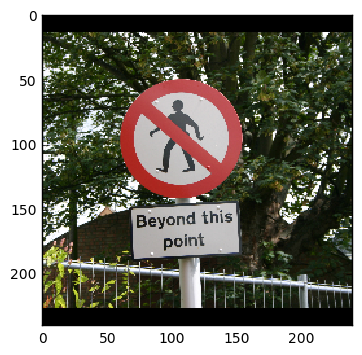

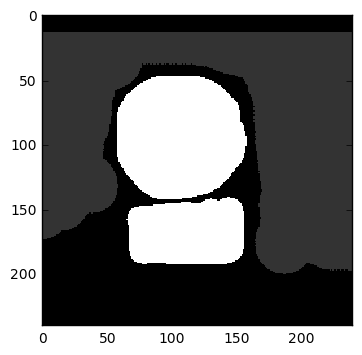

In [3]:
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))

img, target = train_data[1]
print type(img), type(target)
print("Img size: " + str(img.size()))
print("Segmentation size: " + str(target.size()))
plt.figure(figsize=(4,4))
plt.imshow(img.numpy().transpose(1,2,0))
plt.show()
plt.figure(figsize=(4,4))
plt.imshow(target.numpy())
plt.show()

## Train your network
Implement your network architecture in `classifiers.segmentation_network.py` and adapt your `Solver` to process segmentation labels. Think about finetuning a model instead of training from scratch. If you are not equipped with a CUDA GPU test your model locally and then finish training on the computers in our lab.

In [4]:
from dl4cv.classifiers.segmentation_network import SegmentationNetwork
from dl4cv.classifiers.solver import Solver
import torchvision.models as models
import torch.nn as nn
import itertools
############################################################################
#                             YOUR CODE                                    #
############################################################################
#print len(train_data[0][0][0][0])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=3, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=False, num_workers=4)

model = SegmentationNetwork(num_filters=3, kernel_size=3,
                 stride=1, weight_scale=0.001, pool=2, hidden_dim=200,
                 num_classes=23, dropout=0.0, use_resnet18 = True)
for batch in train_loader:
    inputs, labels = Variable(batch[0]), Variable(batch[1])
    outputs = model.forward_for_init(inputs)
    break
    
#model.cuda()

solver = Solver(optim_args={"lr": 1e-3, "weight_decay": 0.0001})
solver.train(model, train_loader, val_loader, log_nth=5, num_epochs=100)

Resnet18 initialized.
Deconv2 initialized.
Deconv3 initialized.
START TRAIN.
[Iteration 1 / 92] TRAIN loss: 3.13512921333
[Iteration 6 / 92] TRAIN loss: 12.980014801
[Iteration 11 / 92] TRAIN loss: 9.91497707367
[Iteration 16 / 92] TRAIN loss: 7.15843582153
[Iteration 21 / 92] TRAIN loss: 14.6673660278
[Iteration 26 / 92] TRAIN loss: 10.535697937
[Iteration 31 / 92] TRAIN loss: 6.11712694168
[Iteration 36 / 92] TRAIN loss: 7.37294578552
[Iteration 41 / 92] TRAIN loss: 4.53040742874
[Iteration 46 / 92] TRAIN loss: 5.03940248489
[Iteration 51 / 92] TRAIN loss: 5.55902814865
[Iteration 56 / 92] TRAIN loss: 7.43187570572
[Iteration 61 / 92] TRAIN loss: 4.71581602097
[Iteration 66 / 92] TRAIN loss: 5.34996747971
[Iteration 71 / 92] TRAIN loss: 5.59964752197
[Iteration 76 / 92] TRAIN loss: 5.36967515945
[Iteration 81 / 92] TRAIN loss: 5.2125787735
[Iteration 86 / 92] TRAIN loss: 6.08511304855
[Iteration 91 / 92] TRAIN loss: 7.68315267563
That took 1073.080333s

[Iteration 1 / 92] TRAIN loss:

Process Process-100:
Process Process-99:
Process Process-97:
Process Process-98:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/daniel/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self.

KeyboardInterrupt: 

# Test your model
Since this dataset is very small we only provided you with a validation set.

In [7]:
test_data = SegmentationData(root='datasets/segmentation_data', image_list='val.txt')
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=1)

test_scores = []
model.cpu()
model.eval()
for batch in test_loader:
    """
    inputs, labels = Variable(batch[0,0:100]), Variable(batch[1,0:100])
    outputs = model.forward(inputs)

    (A,B) = outputs.data.size()
    num_classes = 23;
    outputs = outputs.view(A*B / num_classes, num_classes)
    labels = labels.view(A*240*240)            
    labels_mask = labels >= 0           
    labels_mask_index = Variable(torch.nonzero(labels_mask.data))
    (A,B) = labels_mask_index.size()
    labels_ok = labels_mask_index.data[:,0]
    labels_mask_index = Variable(labels_ok)         
    outputsNew = outputs.index_select(0,labels_mask_index)
    labelsNew = labels.index_select(0,labels_mask_index)
    _, preds = torch.max(outputs, 1)
    labels_mask = labels >= 0
    test_scores.append(np.mean((preds == labels)[labels_mask].data.numpy()))
    """
    inputs, labels = Variable(batch[0]), Variable(batch[1])

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    labels_mask = labels >= 0
    #print inputs.size(), outputs.size(), preds.size(), labels_mask.size(), labels.size()
    #print (preds == labels)[labels_mask].data.numpy()
    test_scores.append(np.mean((preds == labels)[labels_mask].data.numpy()))
    
model.train()
test_acc = np.mean(test_scores)
print(test_acc)

0.548636658525


## Save the model

When you are satisfied with your training, save the model for submission.

In [6]:
model.save("models/segmentation_network.model")

Saving model... models/segmentation_network.model
